# 確率的勾配降下法

---
## 目的
確率的勾配降下法を適用することで，パラメータが目的関数の最小値へと収束する様子を確認する．

## 対応するチャプター
* 5.9: 確率的勾配降下法

## モジュールのインポート
プログラムの実行に必要なモジュールをインポートします．

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani

## 目的関数の設定・描画
はじめに，目的関数を設定，描画します．

今回は
$$z(x, y) = 3x^2 + 5y^2 -6xy$$
という関数を目的関数として設定し，任意の初期値$x_0, y_0$から確率的勾配降下法で$z(x, y)$が最小値となるような最適な値$\hat{x}, \hat{y}$を求めます．

まず，描画するグラフの範囲を指定します．

その後，指定した範囲で目的関数の局面を描画します．

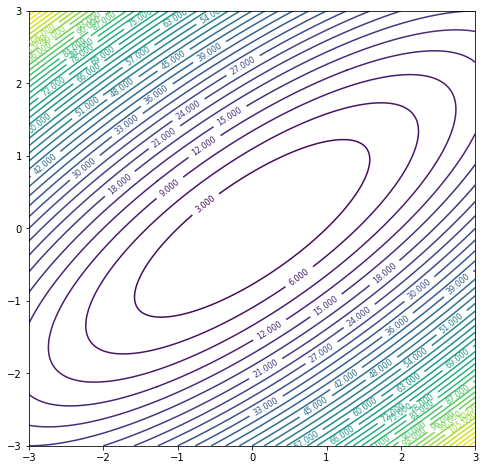

In [125]:
# グラフの範囲を指定
x_low  = -3
x_high = 3
y_low  = -3
y_high = 3

# 格子状に分割した各座標を作成
X = np.linspace(x_low, x_high, 1000)
Y = np.linspace(y_low, y_high, 1000)
X, Y = np.meshgrid(X, Y)

# 関数に従い曲面を作成
Z = (3 * X ** 2) + (5 * Y ** 2) - (6 * X * Y)

# 曲面の描画
plt.figure(figsize=(8, 8))
interval = np.arange(np.min(Z), np.max(Z), 3)
counter_plane = plt.contour(X, Y, Z, interval)
plt.clabel(counter_plane, inline=1, fontsize=8)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()
plt.close()

## 勾配の計算
上記で指定した目的関数の勾配を計算するための関数を定義します．

In [127]:
def get_grad_vec(x, y):
    grad_x = 6 * x - 6 * y
    grad_y = 10 * y - 6 * x
    return [grad_x, grad_y]

## 勾配降下の計算
任意の初期値から，勾配降下法によって目的関数の値が最小となる$x, y$を求めます．

In [131]:
# 初期値の設定
init_x = 0
init_y = 2.9

# 学習率・終了条件の設定
lr = 0.1
epsilon = 0.001

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    n_xs = xs - lr * grad_vec[0]
    n_ys = ys - lr * grad_vec[1]

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    if diff < epsilon:
        break

    xs = n_xs
    ys = n_ys

## 結果の描画
上記の計算で得られた結果を描画します．

まず，前述の方法と同様に，目的関数を描画します．

その後，得られた計算結果を`scatter`と`plot`関数を用いて描画します．

このグラフより，任意の初期値から勾配に従って$x, y$を更新することによって，最終的に最小値付近にまで値が収束していることがわかります．

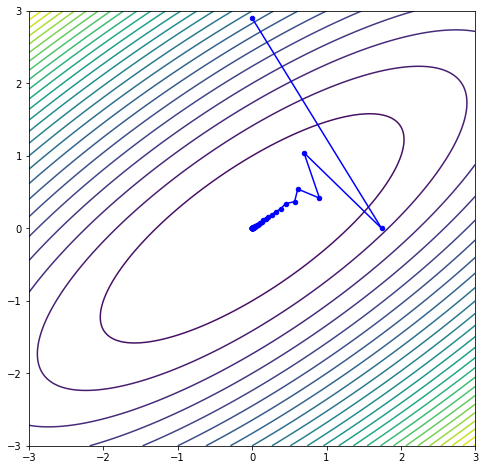

In [132]:
plt.figure(figsize=(8, 8))
interval = np.arange(np.min(Z), np.max(Z), 5.)
plt.contour(X, Y, Z, interval)

for i in range(len(list_xs) - 1):
    plt.plot([list_xs[i-1], list_nxs[i-1]], [list_ys[i-1], list_nys[i-1]], c='b')
plt.scatter(list_xs, list_ys, s=20, c="b")

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()
plt.close()

## 課題
1. 初期値を変更して，収束の様子を確認しましょう